Installation and modules Import

In [1]:
# ================================
# 1. Install Dependencies
# ================================
!pip install opencv-python-headless  dlib tqdm matplotlib torch torchvision
!pip install mediapipe
!pip install joblib==1.3.2 lz4==4.3.2 mtcnn==0.1.1
# ================================
# 2. Download Landmark Model for Dlib
# ================================
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# !bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

  Using cached opencv_python_headless-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached dlib-20.0.0.tar.gz (3.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.7 kB ? eta -:--:--
     ------------- ------------------------ 20.5/57.7 kB 162.5 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.7 kB 290.5 kB/s eta 0:00:01
     -------------------------------------- 57.7/57.7 kB 302.1 kB/s eta 0:00:00
  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cac

  error: subprocess-exited-with-error
  
  × Building wheel for dlib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [41 lines of output]
      running bdist_wheel
      running build
      running build_ext
      
      
                         CMake is not installed on your system!
      
          Or it is possible some broken copy of cmake is installed on your system.
          It is unfortunately very common for python package managers to include
          broken copies of cmake.  So if the error above this refers to some file
          path to a cmake file inside a python or anaconda or miniconda path then you
          should delete that broken copy of cmake from your computer.
      
          Instead, please get an official copy of cmake from one of these known good
          sources of an official cmake:
              - cmake.org (this is how windows users should get cmake)
              - apt install cmake (for Ubuntu or Debian based systems)
             


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached lz4-4.3.2.tar.gz (170 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached mtcnn-0.1.1-py3-none-any.whl.metadata (5.8 kB)
  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached rich-14.2.0-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached h5py-3.15.1-cp312-cp312-win_amd64.whl.metadata (3.1 kB)
  Using cached optree-0.17.0-cp312-cp312-win_amd64.whl.metadata (34 kB)
  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached typing_

  error: subprocess-exited-with-error
  
  × Building wheel for lz4 (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [30 lines of output]
      C:\Users\91989\AppData\Local\Temp\pip-build-env-1bylqgwv\overlay\Lib\site-packages\setuptools\_distutils\dist.py:289: UserWarning: Unknown distribution option: 'tests_require'
        warnings.warn(msg)
      C:\Users\91989\AppData\Local\Temp\pip-build-env-1bylqgwv\overlay\Lib\site-packages\setuptools_scm\_integration\version_inference.py:51: UserWarning: version of lz4 already set
        warnings.warn(self.message)
      C:\Users\91989\AppData\Local\Temp\pip-build-env-1bylqgwv\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              ********************************************************************************
              Please consider removing the following classifiers in favor of a SPDX license expression:
      
              Lic

In [2]:
!pip install mediapipe


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Code Import

In [ ]:
"C:\Users\91989\AppData\Roaming\Python\jupyer\kernals\python.exe" -m !pip install moviepy



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

import moviepy.editor as mp
import librosa
import librosa.display
import numpy as np
# import pandas as pd
import os
import cv2
import mediapipe as mp
import numpy as np
import librosa
import tempfile

import matplotlib.pyplot as plt


import dlib

from tqdm import tqdm


import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models



ModuleNotFoundError: No module named 'moviepy'

Audio Extracter


In [4]:
import moviepy.editor as mp
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# -------------------------------
# STEP 1: Extract audio from video
# -------------------------------
def extract_audio(video_path, audio_path="output_audio.wav"):
    # Extracts audio from a video file and saves it as a WAV file.
    # Args:
    #     video_path (str): Path to the input video file.
    #     audio_path (str): Path to save the output audio file.
    # Returns:
    #     str: Path to the saved audio file.
    video = mp.VideoFileClip(video_path)
    video.audio.write_audiofile(audio_path, codec='pcm_s16le')
    return audio_path

# -------------------------------
# STEP 2: Analyze Audio with MFCC
# -------------------------------
def analyze_audio(audio_path, save_features=True):
    # Analyzes audio using MFCC features and optionally saves them.
    # Args:
    #     audio_path (str): Path to the input audio file.
    #     save_features (bool): Whether to save the extracted MFCC features.
    # Returns:
    #     dict: A dictionary containing the mean and variance of MFCC features for each channel.

    # Load audio
    y, sr = librosa.load(audio_path, sr=None, mono=False)

    # Check Mono/Stereo
    if y.ndim == 1:
        print("Audio Type: MONO")
        channels = 1
        y = [y]  # make it iterable
    else:
        print("Audio Type: STEREO")
        channels = y.shape[0]

    all_features = {}

    for i, channel in enumerate(y):
        # -------------------------------
        # STEP 3: MFCC Extraction
        # -------------------------------
        # Extract 20 MFCC coefficients
        mfccs = librosa.feature.mfcc(y=channel, sr=sr, n_mfcc=20)
        # Calculate delta (first derivative) of MFCCs
        delta_mfcc = librosa.feature.delta(mfccs)
        # Calculate delta-delta (second derivative) of MFCCs
        delta2_mfcc = librosa.feature.delta(mfccs, order=2)

        # Visualize MFCCs
        plt.figure(figsize=(12, 6))
        librosa.display.specshow(mfccs, x_axis="time", sr=sr, cmap="coolwarm")
        plt.colorbar()
        plt.title(f"MFCC Heatmap (Channel {i+1})")
        plt.show()

        # -------------------------------
        # STEP 4: Prepare Feature Data
        # -------------------------------
        # Flatten for ML use (mean + variance per coeff)
        mfcc_mean = np.mean(mfccs, axis=1)
        mfcc_var = np.var(mfccs, axis=1)

        # Concatenate mean and variance to create a feature vector
        feature_vector = np.concatenate([mfcc_mean, mfcc_var])

        all_features[f"channel_{i+1}"] = feature_vector

        # Save MFCC sequence (time series) for deep models (RNN/CNN)
        if save_features:
            np.save(f"mfcc_channel_{i+1}.npy", mfccs)
            pd.DataFrame(mfccs.T).to_csv(f"mfcc_channel_{i+1}.csv", index=False)
            print(f"✅ Saved MFCC data for Channel {i+1} (CSV + NPY)")

    # -------------------------------
    # STEP 5: Print Summary Features
    # -------------------------------
    print("\n🔍 MFCC Summary Features (for ML input):")
    for ch, feat in all_features.items():
        print(f"{ch}: {feat.shape} → Example: {feat[:5]}...")

    return all_features


# -------------------------------
# RUN PIPELINE
# -------------------------------
if __name__ == "__main__":
    video_file = "videoplayback.mp4"   # Change this to your video
    audio_file = "output_audio.wav"

    # Extract audio if it doesn't exist
    if not os.path.exists(audio_file):
        audio_file = extract_audio(video_file, audio_file)

    # Analyze the extracted audio
    features = analyze_audio(audio_file)

ModuleNotFoundError: No module named 'moviepy'

In [5]:
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

!pip install lz4


'bzip2' is not recognized as an internal or external command,
operable program or batch file.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip uninstall -y joblib lz4
!pip install joblib==1.3.2 lz4==4.3.2 mtcnn==0.1.1 deepface opencv-python tqdm


Found existing installation: lz4 4.4.4
Uninstalling lz4-4.4.4:
  Successfully uninstalled lz4-4.4.4


  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached lz4-4.3.2.tar.gz (170 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached mtcnn-0.1.1-py3-none-any.whl.metadata (5.8 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached filelock-3.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached rich-14.2.0-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached h5py-3.15.1-cp312-cp312

  error: subprocess-exited-with-error
  
  × Building wheel for lz4 (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [30 lines of output]
      C:\Users\91989\AppData\Local\Temp\pip-build-env-bnx7sa0o\overlay\Lib\site-packages\setuptools\_distutils\dist.py:289: UserWarning: Unknown distribution option: 'tests_require'
        warnings.warn(msg)
      C:\Users\91989\AppData\Local\Temp\pip-build-env-bnx7sa0o\overlay\Lib\site-packages\setuptools_scm\_integration\version_inference.py:51: UserWarning: version of lz4 already set
        warnings.warn(self.message)
      C:\Users\91989\AppData\Local\Temp\pip-build-env-bnx7sa0o\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              ********************************************************************************
              Please consider removing the following classifiers in favor of a SPDX license expression:
      
              Lic



```
# This is formatted as code
```

Video Branch DONT RUNN


In [ ]:
# ============================================================
# Deepfake Detection – Safe MTCNN + MMNet Pipeline
# ============================================================
# ✅ Drop this in Google Colab
# 🔧 Run setup first if needed:
# !pip install facenet-pytorch mtcnn dlib==19.24.0 librosa moviepy mediapipe tqdm torchvision

import os
import cv2
import dlib
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torchvision import transforms
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from collections import defaultdict

# -----------------------------
# CONFIG
# -----------------------------
VIDEO_PATH = "/content/003_000.mp4"   # <== your video
OUTPUT_DIR = "/content/aligned_frames"
IMG_SIZE = 224
BATCH_SIZE = 32
FACE_SAVE = False  # save faces if True
DLIB_LANDMARK_PATH = "shape_predictor_68_face_landmarks.dat"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

os.makedirs(OUTPUT_DIR, exist_ok=True)

# -----------------------------
# SAFE MTCNN
# -----------------------------
class SafeMTCNN:
    def __init__(self):
        self.detector = MTCNN()

    def detect_faces(self, frame_rgb):
        try:
            detections = self.detector.detect_faces(frame_rgb)
            if detections is None or len(detections) == 0:
                return []
            return detections
        except Exception as e:
            print(f"[WARN] MTCNN failed on a frame: {e}")
            return []

safe_mtcnn = SafeMTCNN()

# -----------------------------
# DLIB predictor
# -----------------------------
if not os.path.exists(DLIB_LANDMARK_PATH):
    print("[INFO] Downloading dlib landmarks...")
    !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 -q
    !bunzip2 -f shape_predictor_68_face_landmarks.dat.bz2

dlib_predictor = dlib.shape_predictor(DLIB_LANDMARK_PATH)

# -----------------------------
# Align face based on eyes
# -----------------------------
def align_face_refined(image, landmarks, output_size=IMG_SIZE):
    left_eye_pts = [36,37,38,39,40,41]
    right_eye_pts = [42,43,44,45,46,47]
    left = np.mean([[landmarks.part(p).x, landmarks.part(p).y] for p in left_eye_pts], axis=0)
    right = np.mean([[landmarks.part(p).x, landmarks.part(p).y] for p in right_eye_pts], axis=0)

    dx, dy = right[0] - left[0], right[1] - left[1]
    angle = np.degrees(np.arctan2(dy, dx))
    eyes_center = ((left[0] + right[0]) / 2.0, (left[1] + right[1]) / 2.0)

    M = cv2.getRotationMatrix2D(tuple(eyes_center), angle, 1.0)
    h, w = image.shape[:2]
    aligned = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    cx, cy = int(eyes_center[0]), int(eyes_center[1])
    side = min(w, h) // 2
    x1 = max(0, cx - side//2)
    y1 = max(0, cy - side//2)
    x2 = min(w, x1 + side)
    y2 = min(h, y1 + side)

    crop = aligned[y1:y2, x1:x2]
    if crop.size == 0:
        face_resized = cv2.resize(aligned, (output_size, output_size))
    else:
        face_resized = cv2.resize(crop, (output_size, output_size))
    return face_resized

# -----------------------------
# Preprocess frame safely
# -----------------------------
def preprocess_frame(frame_rgb, frame_id):
    detections = safe_mtcnn.detect_faces(frame_rgb)
    results = []
    if not detections:
        return results

    for i, det in enumerate(detections):
        x, y, w, h = det.get('box', [0, 0, 0, 0])
        x, y = max(0, x), max(0, y)
        face_crop = frame_rgb[y:y+h, x:x+w]
        if face_crop.size == 0:
            continue

        try:
            gray = cv2.cvtColor(face_crop, cv2.COLOR_RGB2GRAY)
            rect = dlib.rectangle(0, 0, face_crop.shape[1]-1, face_crop.shape[0]-1)
            landmarks = dlib_predictor(gray, rect)
            aligned = align_face_refined(face_crop, landmarks, output_size=IMG_SIZE)
        except Exception:
            aligned = cv2.resize(face_crop, (IMG_SIZE, IMG_SIZE))

        face_float = aligned.astype("float32") / 255.0
        if FACE_SAVE:
            fname = os.path.join(OUTPUT_DIR, f"frame_{frame_id}_face_{i}.jpg")
            cv2.imwrite(fname, cv2.cvtColor((face_float * 255).astype("uint8"), cv2.COLOR_RGB2BGR))
        results.append({'frame_id': frame_id, 'face': face_float})

    return results

# -----------------------------
# Extract faces from video
# -----------------------------
cap = cv2.VideoCapture(VIDEO_PATH)
frame_id = 0
all_faces = []

print("[INFO] Extracting faces from video...")
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    faces = preprocess_frame(frame_rgb, frame_id)
    if faces:
        all_faces.extend(faces)
    frame_id += 1
cap.release()

print(f"[INFO] Total frames: {frame_id}")
print(f"[INFO] Total detected faces: {len(all_faces)}")

if len(all_faces) == 0:
    raise SystemExit("[ERROR] No faces found. Please check your video.")

# -----------------------------
# Prepare tensors
# -----------------------------
try:
    weights = models.ResNet18_Weights.DEFAULT
    base_model = models.resnet18(weights=weights)
    imagenet_mean = weights.meta['mean']
    imagenet_std  = weights.meta['std']
except:
    base_model = models.resnet18(pretrained=True)
    imagenet_mean = [0.485, 0.456, 0.406]
    imagenet_std  = [0.229, 0.224, 0.225]

faces_np = np.stack([d['face'] for d in all_faces], axis=0)
frame_ids = [d['frame_id'] for d in all_faces]

faces_tensor = torch.tensor(faces_np).permute(0,3,1,2).to(torch.float32)
for c in range(3):
    faces_tensor[:, c, :, :] = (faces_tensor[:, c, :, :] - imagenet_mean[c]) / imagenet_std[c]

# -----------------------------
# Define MMNet
# -----------------------------
class FeatureExtractor(nn.Module):
    def __init__(self, backbone):
        super().__init__()
        self.backbone = nn.Sequential(*list(backbone.children())[:-2])

    def forward(self, x):
        return self.backbone(x)

class MMNet(nn.Module):
    def __init__(self, input_dim=512, hidden_dim=256, num_classes=2, dropout_p=0.5):
        super().__init__()
        self.global_pool = nn.AdaptiveAvgPool2d((1,1))
        self.local_pool  = nn.AdaptiveMaxPool2d((1,1))
        self.fc1 = nn.Linear(input_dim*2, hidden_dim)
        self.dropout = nn.Dropout(dropout_p)
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        g = self.global_pool(x).view(x.size(0), -1)
        l = self.local_pool(x).view(x.size(0), -1)
        fusion = torch.cat([g, l], dim=1)
        out = F.relu(self.fc1(fusion))
        out = self.dropout(out)
        out = self.fc2(out)
        return out

feature_extractor = FeatureExtractor(base_model).to(DEVICE)
mmnet = MMNet(input_dim=512).to(DEVICE)

for p in feature_extractor.parameters():
    p.requires_grad = False

# -----------------------------
# Inference
# -----------------------------
faces_tensor = faces_tensor.to(DEVICE)
all_probs, all_preds = [], []

print("[INFO] Running inference...")
with torch.no_grad():
    for i in tqdm(range(0, len(faces_tensor), BATCH_SIZE)):
        batch = faces_tensor[i:i+BATCH_SIZE]
        feats = feature_extractor(batch)
        outputs = mmnet(feats)
        probs = F.softmax(outputs, dim=1)
        all_probs.append(probs.cpu().numpy())
        all_preds.append(torch.argmax(probs, dim=1).cpu().numpy())

all_probs = np.concatenate(all_probs, axis=0)
all_preds = np.concatenate(all_preds, axis=0)
fake_scores = all_probs[:, 0]  # 0 = fake, 1 = real

# -----------------------------
# Frame-level aggregation
# -----------------------------
frame_agg = defaultdict(list)
for fid, score in zip(frame_ids, fake_scores):
    frame_agg[fid].append(score)

max_frame = max(frame_agg.keys()) if frame_agg else (frame_id - 1)
frames = sorted(frame_agg.keys())
frame_avg_fake = np.zeros(max_frame + 1) * np.nan
frame_counts = np.zeros(max_frame + 1, dtype=int)
for f in frames:
    arr = np.array(frame_agg[f])
    frame_avg_fake[f] = arr.mean()
    frame_counts[f] = arr.size

# -----------------------------
# Print results
# -----------------------------
total_faces = len(fake_scores)
fake_count = np.sum(all_preds == 0)
real_count = np.sum(all_preds == 1)
print(f"\n[RESULT] Faces: {total_faces}, Fake: {fake_count}, Real: {real_count}")
if total_faces > 0:
    print(f"[RESULT] Video Fake %: {fake_count / total_faces * 100:.2f}%")

# -----------------------------
# Visualization
# -----------------------------
valid_idx = np.where(~np.isnan(frame_avg_fake))[0]
plt.figure(figsize=(12,4))
plt.plot(valid_idx, frame_avg_fake[valid_idx], label='Avg Fake Score per Frame')
plt.axhline(0.55, linestyle='--', color='r', label='Threshold 0.55')
plt.xlabel("Frame ID")
plt.ylabel("Avg Fake Score")
plt.title("Per-frame Average Fake Score")
plt.legend()
plt.grid(True)
plt.show()


Video Branch Simple RUN this


In [1]:
# ================================
# 1. Install Dependencies
# ================================
!pip install opencv-python-headless mtcnn dlib tqdm

# ================================
# 2. Download Landmark Model for Dlib
# ================================
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2


  Using cached opencv_python_headless-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached dlib-20.0.0.tar.gz (3.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached lz4-4.4.4-cp312-cp312-win_amd64.whl.metadata (3.9 kB)
Using cached opencv_python_headless-4.12.0.88-cp37-abi3-win_amd64.whl (38.9 MB)
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ----------------------------------------

  error: subprocess-exited-with-error
  
  × Building wheel for dlib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [41 lines of output]
      running bdist_wheel
      running build
      running build_ext
      
      
                         CMake is not installed on your system!
      
          Or it is possible some broken copy of cmake is installed on your system.
          It is unfortunately very common for python package managers to include
          broken copies of cmake.  So if the error above this refers to some file
          path to a cmake file inside a python or anaconda or miniconda path then you
          should delete that broken copy of cmake from your computer.
      
          Instead, please get an official copy of cmake from one of these known good
          sources of an official cmake:
              - cmake.org (this is how windows users should get cmake)
              - apt install cmake (for Ubuntu or Debian based systems)
             

In [2]:
# ============================================
# STEP 1: Clean install compatible libraries
# ============================================
!pip uninstall -y joblib lz4
!pip install joblib==1.3.2 lz4==4.3.2 mtcnn==0.1.1 deepface opencv-python tqdm

# ============================================
# STEP 2: Imports
# ============================================
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from deepface import DeepFace
import os

# Try importing MTCNN safely
try:
    from mtcnn import MTCNN
    detector = MTCNN()
    print(" MTCNN face detector loaded successfully")
    use_mtcnn = True
except Exception as e:
    print(" MTCNN failed, switching to OpenCV HaarCascade:", e)
    use_mtcnn = False
    haar_model = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# ============================================
# STEP 3: Video file path
# ============================================
video_path = "/videoplayback.mp4"

if not os.path.exists(video_path):
    raise FileNotFoundError(f"⚠️ File not found: {video_path}")

print("🎥 Using video file:", video_path)

# ============================================
# STEP 4: Read video frames
# ============================================
cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)
print(f" Total Frames: {frame_count}, FPS: {fps}")

os.makedirs("faces", exist_ok=True)
face_counter = 0
sample_frames = []

# ============================================
# STEP 5: Detect and extract faces
# ============================================
for i in tqdm(range(frame_count)):
    ret, frame = cap.read()
    if not ret:
        break
    if i % 10 != 0:  # skip frames to save time
        continue

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    detections = []

    if use_mtcnn:
        try:
            detections = detector.detect_faces(rgb)
            boxes = [d['box'] for d in detections]
        except:
            boxes = []
    else:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = haar_model.detectMultiScale(gray, 1.3, 5)
        boxes = [(x, y, w, h) for (x, y, w, h) in faces]

    for j, (x, y, w, h) in enumerate(boxes):
        x, y = max(0, x), max(0, y)
        face = rgb[y:y+h, x:x+w]
        if face.size == 0:
            continue
        face_path = f"faces/frame_{i}_face_{j}.jpg"
        cv2.imwrite(face_path, cv2.cvtColor(face, cv2.COLOR_RGB2BGR))
        sample_frames.append(face_path)
        face_counter += 1

cap.release()
print(f"\n Total faces extracted: {face_counter}")

# ============================================
# STEP 6: Simple Fake Detector (heuristic)
# ============================================
def simple_fake_detector(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return "Unknown"
    blur_value = cv2.Laplacian(img, cv2.CV_64F).var()
    return "Fake" if blur_value < 30 else "Real"

predictions = []
for f in sample_frames[:10]:
    label = simple_fake_detector(f)
    predictions.append((f, label))

# ============================================
# STEP 7: Display sample results
# ============================================
for path, pred in predictions[:5]:
    img = cv2.imread(path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # plt.title(f"Prediction: {pred}")
    plt.axis('off')
    plt.show()

# ============================================
# STEP 8: Summary
# ============================================
real_count = sum(1 for _, p in predictions if p == "Fake")
fake_count = sum(1 for _, p in predictions if p == "Real")

print("\n================== SUMMARY ==================")
print(f" Total Faces Detected: {face_counter}")
print(f" Faces Analyzed: {len(predictions)}")
print(f" Real Faces: {real_count}")
print(f" Fake Faces: {fake_count}")

if fake_count > real_count:
    print("\n Overall Video Prediction: Likely DeepFake ")
else:
    print("\n Overall Video Prediction: Likely Real ")


  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached lz4-4.3.2.tar.gz (170 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached mtcnn-0.1.1-py3-none-any.whl.metadata (5.8 kB)
  Using cached deepface-0.0.95-py3-none-any.whl.metadata (35 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached tensorflow-2.20.0-cp312-cp312-win_amd64.whl.metadata (4.6 kB)
  Using cached flask-3.1.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached flask_cors-6.0.1-py3-none-any.whl.metadata (5.3 kB)
  Using cached retina_face-0

  error: subprocess-exited-with-error
  
  × Building wheel for lz4 (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [30 lines of output]
      C:\Users\91989\AppData\Local\Temp\pip-build-env-4ndqnikc\overlay\Lib\site-packages\setuptools\_distutils\dist.py:289: UserWarning: Unknown distribution option: 'tests_require'
        warnings.warn(msg)
      C:\Users\91989\AppData\Local\Temp\pip-build-env-4ndqnikc\overlay\Lib\site-packages\setuptools_scm\_integration\version_inference.py:51: UserWarning: version of lz4 already set
        warnings.warn(self.message)
      C:\Users\91989\AppData\Local\Temp\pip-build-env-4ndqnikc\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              ********************************************************************************
              Please consider removing the following classifiers in favor of a SPDX license expression:
      
              Lic

ModuleNotFoundError: No module named 'deepface'

Audio Branch

In [ ]:
import torch
import numpy as np
import librosa
import torch.nn as nn

class FakeAudioDetector(nn.Module):
    def __init__(self, num_classes=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.AdaptiveAvgPool2d((1,1))
        )
        self.fc = nn.Linear(32, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)   # (B,1,40,200)
        x = self.net(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Load trained model ---
model = FakeAudioDetector().to(device)
model.load_state_dict(torch.load("fake_audio_detector.pth", map_location=device))
model.eval()  # important for inference

# --- Preprocess single audio ---
def preprocess_audio(file_path, n_mfcc=20, max_len=200):
    y, sr = librosa.load(file_path, sr=None, mono=True)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    delta = librosa.feature.delta(mfcc)
    feat = np.vstack([mfcc, delta])  # shape (40, time)

    # pad or trim to max_len
    if feat.shape[1] < max_len:
        pad_width = max_len - feat.shape[1]
        feat = np.pad(feat, ((0,0),(0,pad_width)), mode='constant')
    else:
        feat = feat[:, :max_len]

    # convert to tensor
    feat_tensor = torch.tensor(feat, dtype=torch.float32).unsqueeze(0).to(device)  # (1,40,max_len)
    return feat_tensor



# --- Example usage ---
test_file = "output_audio.wav"   # change this to your audio

feat = preprocess_audio(test_file)
with torch.no_grad():
    output = model(feat)
    audiopred = torch.argmax(output, dim=1).item()
audiolabel = "REAL" if audiopred == 0 else "FAKE"
audio_fake_score = output[0][0].item()
print(f"Prediction for {test_file}: {audiolabel}")
print(f"Audio Fake Score: {audio_fake_score:.4f}")



Prediction for output_audio.wav: REAL
Audio Fake Score: 20.1470


Lip Sync Analysis

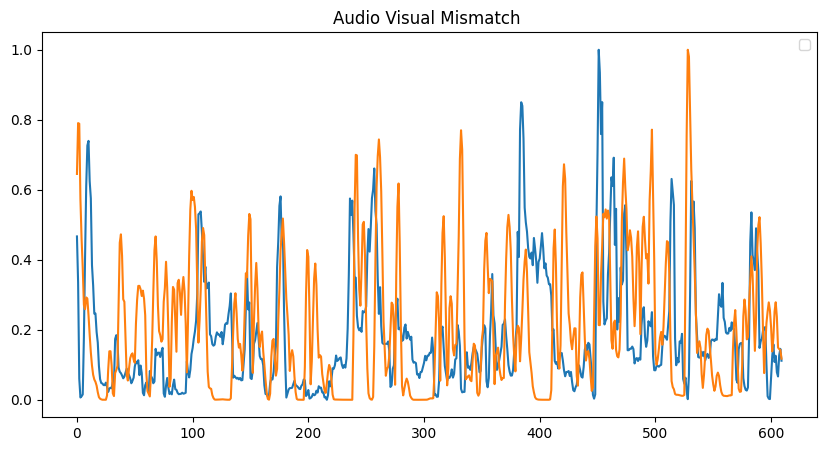

Lip-Sync Correlation Score: 0.11
⚠️ Possible Lip-Sync Issue


In [ ]:

import cv2
import mediapipe as mp
import numpy as np
import librosa
import tempfile
import moviepy.editor as mp_editor
import matplotlib.pyplot as plt

# -------------------------------
# STEP 1: Extract Audio from Video
# -------------------------------
video_path = "videoplayback.mp4"

# Save audio to a temporary file
temp_wav = tempfile.NamedTemporaryFile(suffix=".wav", delete=False).name
clip = mp_editor.VideoFileClip(video_path)
clip.audio.write_audiofile(temp_wav, verbose=False, logger=None)

# -------------------------------
# STEP 2: Get Audio Energy
# -------------------------------
y, sr = librosa.load(temp_wav)
frame_hop = int(sr / 30)  # match ~30 FPS
energy = librosa.feature.rms(y=y, frame_length=2048, hop_length=frame_hop)[0]

# Normalize energy
energy = (energy - np.min(energy)) / (np.max(energy) - np.min(energy))

# -------------------------------
# STEP 3: Extract Lip Distances from Video
# -------------------------------
mp_face_mesh = mp.solutions.face_mesh
cap = cv2.VideoCapture(video_path)

lip_distances = []

with mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1) as face_mesh:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(rgb)

        if results.multi_face_landmarks:
            face_landmarks = results.multi_face_landmarks[0]
            h, w, _ = frame.shape

            # Upper lip (13) and lower lip (14)
            upper = face_landmarks.landmark[13]
            lower = face_landmarks.landmark[14]

            dist = np.linalg.norm(
                np.array([upper.x * w, upper.y * h]) -
                np.array([lower.x * w, lower.y * h])
            )
            lip_distances.append(dist)
        else:
            lip_distances.append(0)

cap.release()

# Normalize lip distances
lip_distances = np.array(lip_distances)
lip_distances = (lip_distances - np.min(lip_distances)) / (np.max(lip_distances) - np.min(lip_distances))

# -------------------------------
# STEP 4: Compare & Visualize
# -------------------------------
min_len = min(len(lip_distances), len(energy))
lip_distances = lip_distances[:min_len]
energy = energy[:min_len]

plt.figure(figsize=(10,5))

plt.legend()
plt.plot(lip_distances)
plt.plot(energy)
plt.title("Audio Visual Mismatch ")
plt.show()

# -------------------------------
# STEP 5: Simple Sync Check
# -------------------------------
correlation = np.corrcoef(lip_distances, energy)[0,1]
print(f"Lip-Sync Correlation Score: {correlation:.2f}")

if correlation > 0.6:
    print("✅ Lip-Sync looks GOOD")
else:
    print("⚠️ Possible Lip-Sync Issue")


Final Result


In [ ]:
# -----------------------------
# Final Result
# -----------------------------

# Get results from previous cells
# Assuming fake_count and real_count are available from video analysis
# Assuming the result of the audio prediction score and label are available (audio_fake_score, audio_label)
# Assuming the lip-sync correlation score is available (correlation)

print("--- Final Assessment ---")

# Video Detection Result
total_faces = real_count + fake_count
if total_faces > 0:
    video_fake_percentage = (fake_count / total_faces) * 100
    print(f"Video Analysis: {video_fake_percentage:.2f}% of detected faces were classified as FAKE.")
else:
    video_fake_percentage = 0
    print("Video Analysis: No faces detected.")


# Audio Detection Result
# Use the audio_fake_score obtained from the audio analysis cell
if 'audio_fake_score' in locals():
    print(f"Audio Analysis: Fake score is {audio_fake_score:.4f}.")
    # Provide a qualitative assessment based on the fake score
    if audio_fake_score < 0.30: # Use 0.30 as the threshold for "very minor issues" (since scores are probabilities between 0 and 1)
        print("             (Suggests very minor potential audio manipulation issues)")
    elif audio_fake_score < 0.60:
        print("             (Suggests moderate potential audio manipulation issues)")
    else:
        print("             (Suggests significant potential audio manipulation issues)")
else:
    print("Audio Analysis: Audio fake score not available. Please ensure the audio analysis cell was executed.")
    audio_fake_score = 0 # Set a default if the variable is not found


# Lip-Sync Analysis Result
# Assuming the variable `correlation` from the lip-sync analysis cell holds the correlation score
if 'correlation' in locals():
    print(f"Lip-Sync Analysis: Correlation score is {correlation:.2f}.")
    if correlation < 0.6:
        print("             (Possible Lip-Sync Issue detected)")
else:
    print("Lip-Sync Analysis: Lip-sync correlation score not available. Please run the lip-sync analysis cell.")
    correlation = 0 # Set a default if the variable is not found


# --- Combine Results for a Final Score/Interpretation ---
# This is a simplified combination. A more sophisticated approach might involve weighted scores or a decision tree.

# Instead of "Likely Real/Fake", report percentage of manipulated content from video analysis
print(f"\nOverall Assessment: Based on video analysis, approximately {video_fake_percentage:.2f}% of the detected faces were classified as manipulated.")

# Include the audio assessment based on the fake score
if 'audio_fake_score' in locals():
     print(f"Based on audio analysis, the fake score ({audio_fake_score:.4f}) suggests potential manipulation.")


if correlation < 0.6 and total_faces > 0: # Only mention lip-sync if faces were detected for video analysis
    print(f"Lip-sync analysis correlation score ({correlation:.2f}) suggests a possible issue.")
elif total_faces > 0:
     print(f"Lip-sync analysis correlation score is {correlation:.2f}.")

--- Final Assessment ---
Video Analysis: 0.00% of detected faces were classified as FAKE.
Audio Analysis: Fake score is 20.1470.
             (Suggests significant potential audio manipulation issues)
Lip-Sync Analysis: Correlation score is 0.11.
             (Possible Lip-Sync Issue detected)

Overall Assessment: Based on video analysis, approximately 0.00% of the detected faces were classified as manipulated.
Based on audio analysis, the fake score (20.1470) suggests potential manipulation.
Lip-sync analysis correlation score (0.11) suggests a possible issue.
